In [6]:
import torch
from normalizing_flows import Flow
from normalizing_flows.architectures import RealNVP
import matplotlib.pyplot as plt
import numpy as np

(-18.292211012045467,
 17.91856696968295,
 -17.736420076651342,
 17.630416084506543)

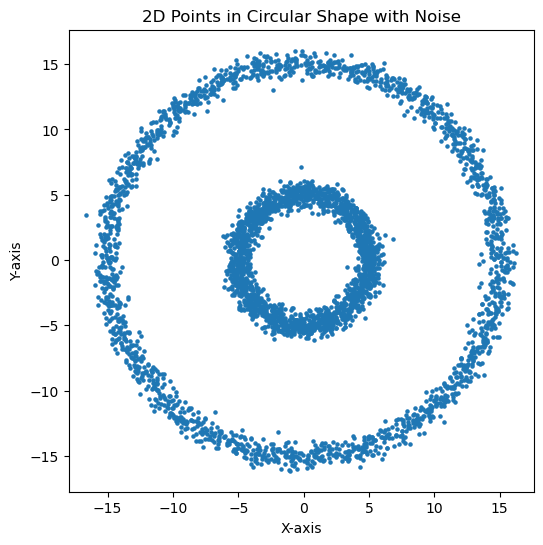

In [24]:
def generate_circular_data(num_points, radius, noise_factor):
    # Generate angles uniformly
    angles = np.linspace(0, 2*np.pi, num_points)
    
    # Create points in polar coordinates
    x = radius * np.cos(angles)
    y = radius * np.sin(angles)
    
    # Add noise to the points
    x += np.random.normal(0, noise_factor, num_points)
    y += np.random.normal(0, noise_factor, num_points)
    
    return x, y

# Number of points, radius of the circle, and noise factor
num_points = 2000
radius = 5
noise_factor = 0.5

# Generate the dataset
x1, y1 = generate_circular_data(num_points, radius, noise_factor)
x2, y2 = generate_circular_data(num_points, radius*3, noise_factor)

# Concatenate the two datasets
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])

# Plot the generated points
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=5)
plt.title('2D Points in Circular Shape with Noise')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')


In [ ]:
torch.manual_seed(0)

n_data = 1000
n_dim = 2

x = torch.randn(n_data, n_dim)  # Generate some training data
bijection = RealNVP(n_dim)  # Create the bijection
flow = Flow(bijection)  # Create the normalizing flow

flow.fit(x)  # Fit the normalizing flow to training data
log_prob = flow.log_prob(x)  # Compute the log probability of training data
x_new = flow.sample(50)  # Sample 50 new data points

print(log_prob.shape)  # (100,)
print(x_new.shape)  # (50, 3)